<img src="https://github.com/Databricks-BR/openfinance/blob/main/images/openfinance_head.png?raw=true">

### Version Code Control

| versão | data | autor | e-mail | alterações |
| --- | --- | --- | --- | --- |
| 1.0 | 10-ago-2023 | Luis Assunção | luis.assuncao@databricks.com | Primeira versão |

### Description

| projeto | aplicação | módulo | objetivo |
| --- | --- | --- | --- | 
| Open Finance Lakehouse | Finance | Modelo | Correlação Fundos |

In [0]:
%python
import pandas as pd
from pyspark.sql import SparkSession

url = f"https://raw.githubusercontent.com//Databricks-BR/openfinance/main/dados/"

catalog_name = f"openfinance"
schema_name =  f"external_data"
prefix_table = f"gold"



In [0]:
%python

entity_name  = f"fundos_previdencia"

table_name   = f"{catalog_name}.{schema_name}.{prefix_table}_{entity_name}"
file_name = f"{url}{entity_name}.csv"

df = pd.read_csv(file_name)                          # leitura arquivo CSV utilizando Dataframe Pandas
s_df = spark.createDataFrame(df)                     # converte Dataframe Pandas em Spark Dataframe
s_df.write.mode("overwrite").saveAsTable(table_name) # grava o DataFrame na Tabela Delta

In [0]:
%python
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
import numpy as np
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2



In [0]:
!pip install heatmapz


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [0]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com//Databricks-BR/openfinance/main/dados/fundos_previdencia.csv')

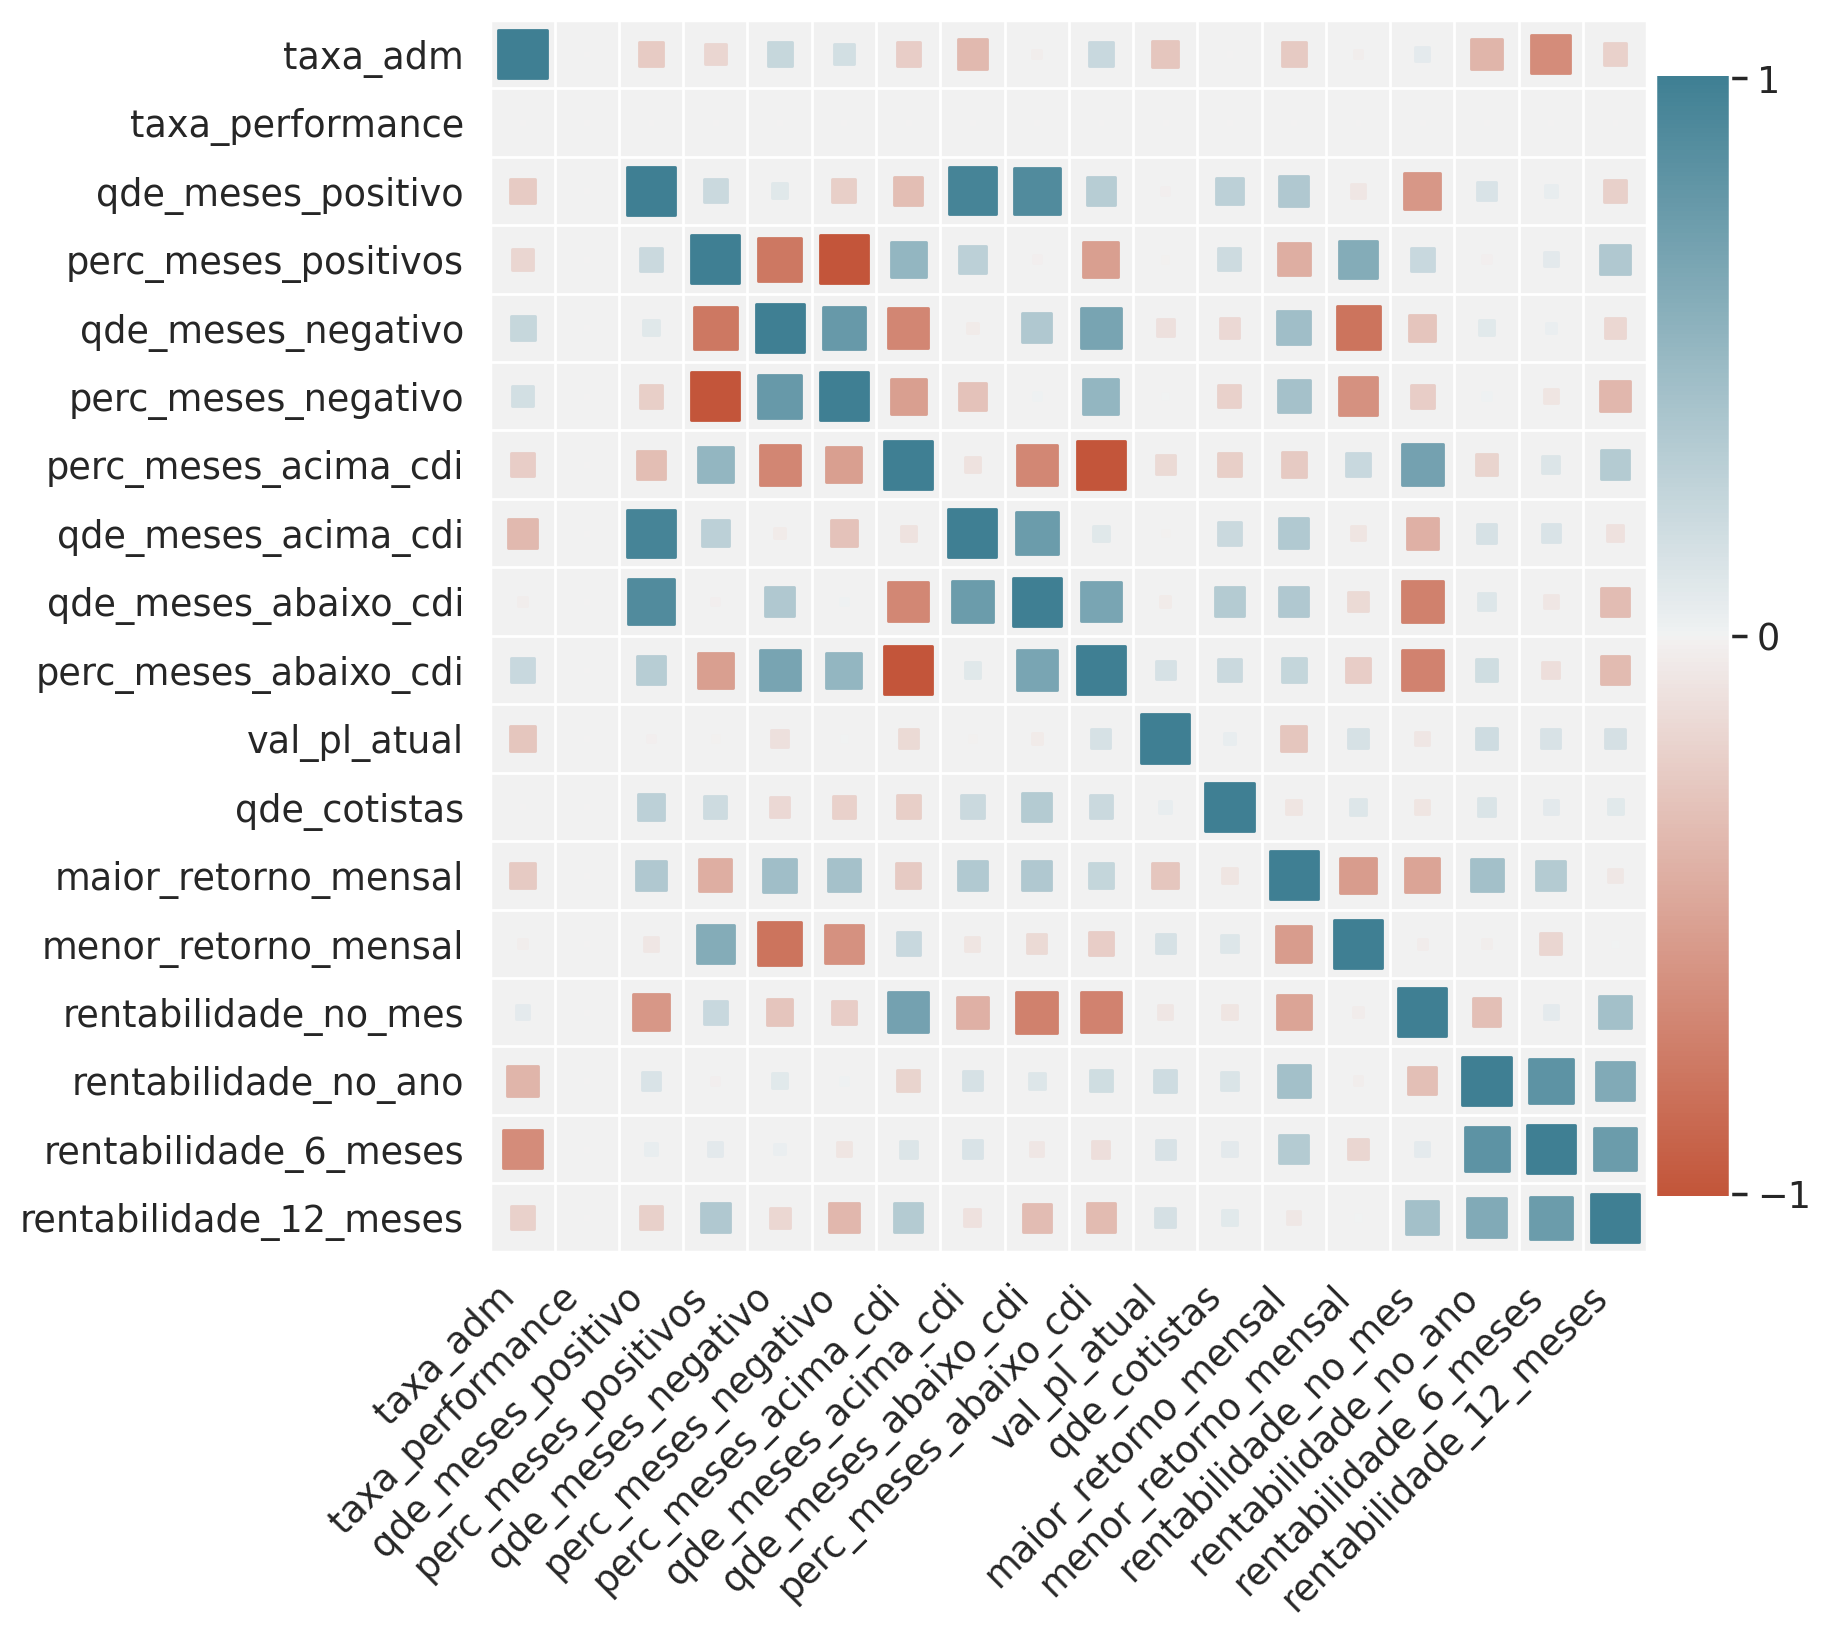

In [0]:
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);